In [97]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name = 'a')
    b = tf.constant(2, name = 'b')
    c = tf.constant(3, name = 'c')
    z = 2*(a-b)+c

with tf.compat.v1.Session(graph=g) as sess:
    print(sess.run(z))
    

1


In [98]:
a = tf.constant(1, name = 'a')
b = tf.constant(2, name = 'b')
c = tf.constant(3, name = 'c')
z = 2*(a-b)+c

tf.print(z)

1


In [99]:
@tf.function
def compute_z(a,b,c):
    r1 = tf.subtract(a,b)
    r2 = tf.multiply(2,r1)
    z = tf.add(r2,c)
    return z

tf.print(compute_z([1,1],[2,2],[3,3]))

[1 1]


In [100]:
w = tf.Variable([1,2,3],trainable = False)
print(w)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [101]:
print(w.assign([3,1,4], read_value = True))

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>


In [102]:
print(w.assign_add([2,-1,2], read_value = True))


<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([5, 0, 6], dtype=int32)>


In [103]:
print(w.value())

tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [104]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


In [105]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2,3)))
        self.w2 = tf.Variable(init(shape=(1,2)),trainable = False)

m = MyModule()
print([v.shape for v in m.trainable_variables])

[TensorShape([2, 3])]


In [106]:
w = tf.random.uniform((3,3))
print(w)

tf.Tensor(
[[0.2364521  0.23877335 0.50363123]
 [0.77354    0.61077476 0.8721783 ]
 [0.2728473  0.6183162  0.20251584]], shape=(3, 3), dtype=float32)


In [107]:
w = tf.Variable([[1.0,2.0,3.0]])

@tf.function
def f(x):
    return tf.matmul(w,x)

x = tf.constant([[1],[2],[3]], dtype = tf.float32)
tf.print(f(x))

[[14]]


In [108]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)

print(w.trainable, b.trainable)

True True


In [109]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

x

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.4], dtype=float32)>

In [110]:
tf.print(2*x *(w*x+b-y))

[-0.559999764]


In [111]:
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w,x),b)
    loss = tf.reduce_sum(tf.square(y-z))

dloss_dw = tape.gradient(loss,w)
tf.print(dloss_dw)

-0.559999764


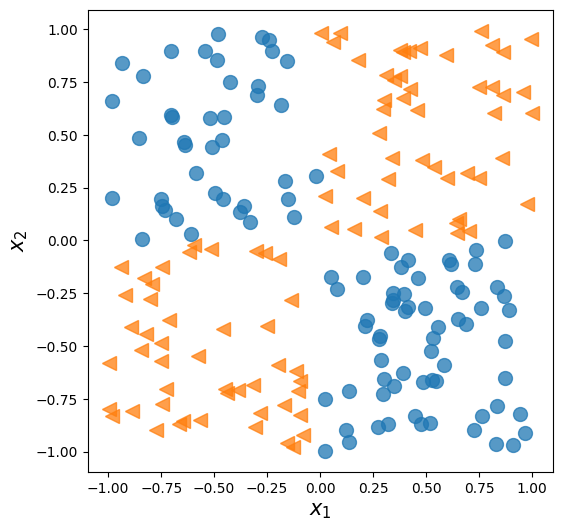

In [112]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
import numpy as np

x = np.random.uniform(low = -1, high = 1, size = (200,2))
y = np.ones(len(x))
y[x[:,0]*x[:,1]<0] = 0

x_train = x[:100,:]
y_train = y[:100]
x_valid = x[100:,:]
y_valid = y[100:]

fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0,0],x[y==0,1],'o', alpha = 0.75, markersize = 10)
plt.plot(x[y==1,0],x[y==1,1],'<', alpha = 0.75, markersize = 10)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$x_2$',size=15)
plt.show()

In [113]:
x_train

array([[-0.70018173,  0.58576958],
       [ 0.34029838, -0.29874251],
       [-0.70362471,  0.89619393],
       [ 0.05943989,  0.94138222],
       [ 0.02159075, -0.9961725 ],
       [-0.75319442, -0.4841973 ],
       [ 0.53299869, -0.46286288],
       [-0.19654476, -0.58915988],
       [ 0.76296548, -0.83076067],
       [ 0.82215366,  0.60442795],
       [ 0.20328069,  0.20073939],
       [ 0.72590633, -0.90041031],
       [-0.74930897, -0.57284286],
       [ 0.02314722,  0.2087737 ],
       [ 0.3009664 , -0.65600278],
       [ 0.64776148,  0.0341019 ],
       [-0.85400095,  0.4830747 ],
       [-0.18523579,  0.6426855 ],
       [ 0.47507981, -0.86916835],
       [ 0.29968981,  0.66329228],
       [ 0.38368559, -0.12627461],
       [ 0.59198214,  0.87578725],
       [ 0.72988525, -0.1126438 ],
       [ 0.8587719 ,  0.38999053],
       [-0.4601042 , -0.42049995],
       [ 0.4612441 , -0.18052821],
       [-0.45183993,  0.58268855],
       [-0.29694657,  0.6880391 ],
       [ 0.87337633,

In [114]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=(2,),activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),epochs=200, batch_size = 2, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  


20000/20000 [==============================] - 36s 2ms/step


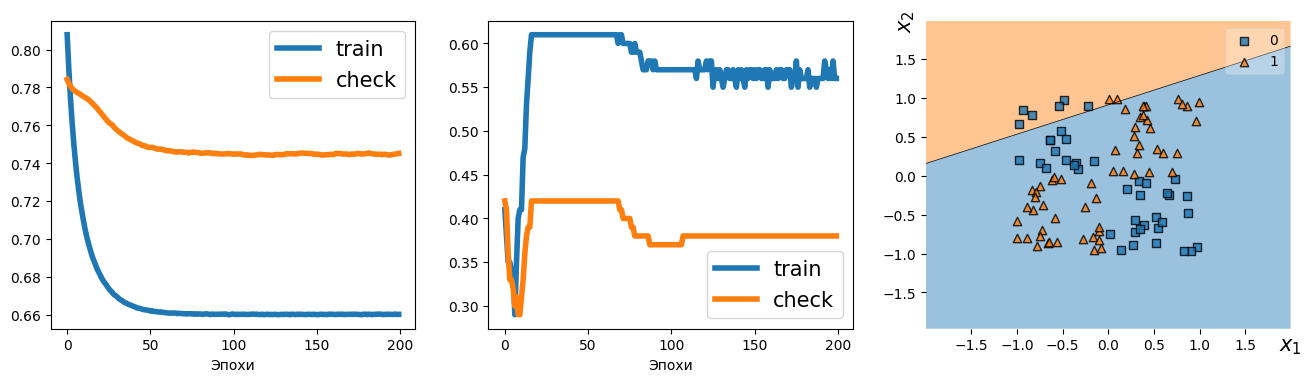

In [116]:
history = hist.history
fig=plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'],lw=4)
plt.plot(history['val_loss'],lw=4)
plt.legend(['train','check'],fontsize=15)
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'],lw=4)
plt.plot(history['val_binary_accuracy'],lw=4)
plt.legend(['train','check'],fontsize=15)
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),clf=model)
ax.set_xlabel(r'$x_1$',size=15)
ax.xaxis.set_label_coords(1,-0.025)
ax.set_ylabel(r'$x_2$',size=15)
ax.yaxis.set_label_coords(-0.025,1)
plt.show()

In [140]:
y_train

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.])

In [138]:
type(y_train)

numpy.ndarray

In [136]:
np.max(y_train)

0.9978571230392193

In [137]:
np.min(y_train)

-0.9961724991039036

In [139]:
np.std(y_train)

0.5658038690941396

In [121]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,),activation = 'relu'))
model.add(tf.keras.layers.Dense(units=4,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=4,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 4)                 12        
                                                                 
 dense_91 (Dense)            (None, 4)                 20        
                                                                 
 dense_92 (Dense)            (None, 4)                 20        
                                                                 
 dense_93 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics =[tf.keras.metrics.BinaryAccuracy()])

In [123]:
hist = model.fit(x_train,y_train,validation_data=(x_valid, y_valid),epochs=200,batch_size=2,verbose=0)

In [131]:
y_valid

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.])

In [141]:
np.min(y_valid)

0.0

In [142]:
np.max(y_valid)

1.0

In [152]:
y_pred = np.reshape(model.__call__(x_valid),100)
y_pred = np.float16(y_pred>=0.5)
y_pred

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float16)

In [150]:
y_valid

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.])

In [134]:
(y_pred>0.5).astype(np.integer)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  """Entry point for launching an IPython kernel.


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  


20000/20000 [==============================] - 25s 1ms/step


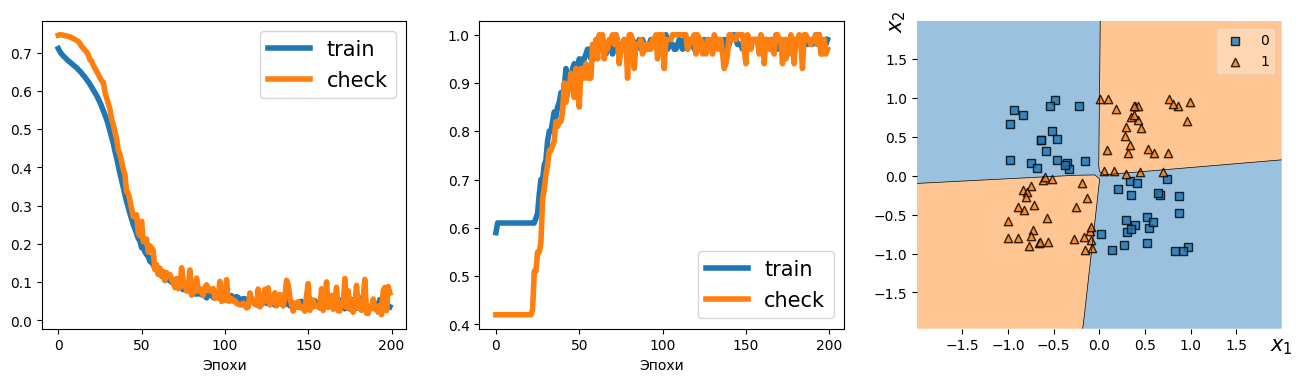

In [147]:
history = hist.history
fig=plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'],lw=4)
plt.plot(history['val_loss'],lw=4)
plt.legend(['train','check'],fontsize=15)
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'],lw=4)
plt.plot(history['val_binary_accuracy'],lw=4)
plt.legend(['train','check'],fontsize=15)
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),clf=model)
ax.set_xlabel(r'$x_1$',size=15)
ax.xaxis.set_label_coords(1,-0.025)
ax.set_ylabel(r'$x_2$',size=15)
ax.yaxis.set_label_coords(-0.025,1)
plt.show()